### Project Milestone 4 | Kelly Chiv

### - **Section 1: Introduction** - 

- The `comma_survey` dataset from the `fivethirtyeight` package in R is a survey dataset that can be used for statistical data analysis. It includes responses from survey participants regarding their preferences on the use of the Oxford comma in English writing. My goal for this project is to challenge my programming abilities in Python by elaborating upon statistical analysis concepts that I previously learned. Using the `comma_survey` data set, I plan to explore the conversion of categorical variables to numeric, dummy variables, enabling such numeric analysis. To further the points from my project, I have employed the usage of two chi-square tests and grouped/stacked bar charts & bar graphs to create a visual representation behind the data.

### - **Section 2: Data Description** - 

- The data set that I hope to conduct further analysis on is the comma_survey data set. As previously mentioned, it provides results from a 2014 survey about the proper usage of the Oxford comma. It depicts variables, such as age, gender, household income, education, U.S. geographic location, character, ordinal, boolean data. I thought this package was interesting because it includes character data, which I haven't had much opportunity to work with, and have always wondered about proper usage of the Oxford Comma. I hope to further elaborate upon my findings through manipulating and preparing multiple variables, such as `education` ('graduate' & 'bachelors') and `care_alot`, geographic representation of survey respondents via `location`, and `gender` ('female' & 'male') and `data_singular_plural`.

- Documentation URL: https://www.rdocumentation.org/packages/fivethirtyeight/versions/0.5.0/topics/comma_survey

- Unit of Observation: 1129 observations from people

- Overview of Variables in Data Set: (see the code chunk below)


In [23]:
# Overview of Variables in the Data Set

# loading in the library
import pandas as pd

# reading in the data (.csv file)
commaSurvey = pd.read_csv('C:\\Users\\kcchi\\Downloads\\DSC_201\\data\\comma_survey.csv')

# getting the column names 
commaSurvey_names = commaSurvey.columns
print("Column Names:", commaSurvey_names)

Column Names: Index(['Unnamed: 0', 'respondent_id', 'gender', 'age', 'household_income',
       'education', 'location', 'more_grammar_correct', 'heard_oxford_comma',
       'care_oxford_comma', 'write_following', 'data_singular_plural',
       'care_data', 'care_proper_grammar'],
      dtype='object')


### - **Section 3: Research Questions** -

**Research Question #1**: Are people with a graduate degree more likely to care a lot about usage of the Oxford comma than people with a bachelor degree?

- **NOTE**: 'care_alot' is a dummy binary variable that I will need to create from 'care_oxford_comma' in order to do an independent t-test

- **Why is it valuable?**
    - I believe this relationship between individuals who have a bachelors' degree and if they care a lot about the correct usage of the Oxford Comma important to look into. I hypothesize that the higher one's educational background is, the more they would care about the grammatically correct usage of the Oxford comma. I would like to see which of these two groups has a statistically significant relationship.

**Research Question #2**: What is the geographic location distribution of all respondents?

- **Why is it valuable?**
    - It is insightful to have an understanding of the overall geographic representation of respondents for the comma survey. This could raise awareness about any potential data skews or under/over-representation.

**Research Question #3**: Which gender group (male/female) has spent time considering if the word, "data", is a singular or plural noun?

- **Why is it valuable?**
    - It is interesting to see out of two genders, which group thinks more about the usage of "data" as either a singular or plural noun. In my experience, I have seen more females think about the noun usage of "data"; thus, I wanted to apply a similar logic to uncover the answer to this question.

### - **Section 4-6: Analysis, Findings, Discussion** -

#### **Research Question 1** - Are people with a graduate degree more likely to care a lot about usage of the Oxford comma than people with a bachelor degree?
- **Variables used to answer the question + any operations done to prep variables**
    - Variables = 'education (bachelors)' & 'care_alot'; 'education (graduate)' & 'care_alot'
    - Operations = Convert 'care_oxford_comma' into 'care_alot' (dummy binary variable to indicate 1 = care a lot, 0 = all else); 'education' into 'education_bachelors' & 'education_graduate'. I need to do this step in order to properly conduct a t-test analysis on categorical-turned-numeric data.

- **Analyses I will perform + Cleaning & Prep**
    - Data Moves: Filter out for 1s ('care_alot'), parse out both the graduate and bachelor row values from the 'education' variable 
    - Statistics: Chi-Square Test
    - Data Visualizations: Stacked/Grouped Bar Chart
    - Information presented: Using the results to understand if the relationship is statistically significant (p <0.05; unlikely to occur by random chance or to predict a reliable association).

In [24]:
# load in necessary libraries
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# loading in data
commaSurvey = pd.read_csv('C:\\Users\\kcchi\\Downloads\\DSC_201\\data\\comma_survey.csv')

# creating dummy variables
commaSurvey['education_bachelors'] = (commaSurvey['education'] == 'Bachelor degree').astype(int)
commaSurvey['education_graduate'] = (commaSurvey['education'] == 'Graduate degree').astype(int)
commaSurvey['care_alot'] = (commaSurvey['care_data'] == 'A lot').astype(int)

# printing out the results of the dummy variable columns
print(commaSurvey['education_bachelors'])
print(commaSurvey['education_graduate'])

# filtering out the entries for bachelors and graduates recipients
bachelors_group = commaSurvey[commaSurvey['education_bachelors'] == 1]['care_alot']
graduate_group = commaSurvey[commaSurvey['education_graduate'] == 1]['care_alot']

0       1
1       0
2       0
3       0
4       0
       ..
1124    0
1125    0
1126    0
1127    0
1128    1
Name: education_bachelors, Length: 1129, dtype: int32
0       0
1       1
2       0
3       0
4       0
       ..
1124    0
1125    0
1126    1
1127    1
1128    0
Name: education_graduate, Length: 1129, dtype: int32


In [25]:
# conduct first chi-square test between 'education_bachelors' & 'care_alot' 
contingency_table_bachelors = pd.crosstab(commaSurvey['education_bachelors'], 
                                          commaSurvey['care_alot'])
chi2_bachelors, p_bachelors, _, _ = chi2_contingency(contingency_table_bachelors)

# conduct second chi-square test between 'education_graduate' & 'care_alot' 
contingency_table_graduate = pd.crosstab(commaSurvey['education_graduate'], 
                                         commaSurvey['care_alot'])
chi2_graduate, p_graduate, _, _ = chi2_contingency(contingency_table_graduate)

# display results from the chi-square tests
print(f"Chi-square test for Bachelors education and care_alot:")
print(f"Chi-square statistic: {chi2_bachelors}, p-value: {p_bachelors}\n")
print(f"Chi-square test for Graduate student education and care_alot:")
print(f"Chi-square statistic: {chi2_graduate}, p-value: {p_graduate}\n")

Chi-square test for Bachelors education and care_alot:
Chi-square statistic: 1.4600383658208504, p-value: 0.22692401644627144

Chi-square test for Graduate student education and care_alot:
Chi-square statistic: 11.792532365594852, p-value: 0.0005946878549153646



- **Findings**: Regarding the results from the chi-square test, the relationship between 'education_bachelors' and 'care_alot' is statistically insignificant, with p = 0.226 (i.e., it does not reliably predict whether someone with a bachelors degree cares/does not care about correct oxford comma usage). 
    - On the other hand, the relationship between 'education_graduate' and 'care_alot' is statistically significant, with p = 0.0005 (i.e., there is a reliable, non-random association in predicting whether someone  with a masters degree cares/does not care about correct oxford comma usage).

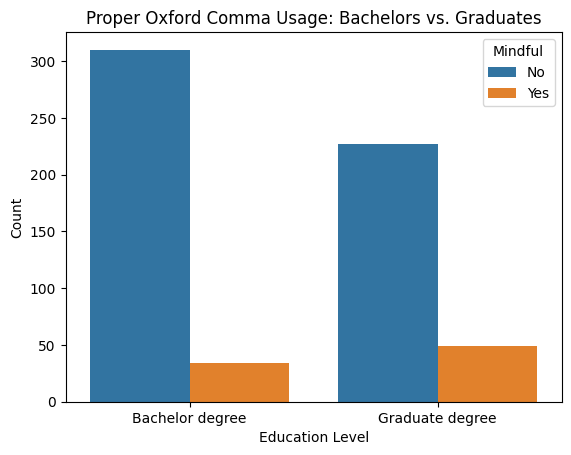

In [26]:
# stacked bar chart visualizing the distribution of care_alot across education levels
fig, ax = plt.subplots()
sns.countplot(data=commaSurvey, x='education', hue='care_alot', 
              order=['Bachelor degree', 'Graduate degree'])

# setting labels for the plot
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.set_title('Proper Oxford Comma Usage: Bachelors vs. Graduates')
ax.legend(title='Mindful', labels=['No', 'Yes'])

# displaying the plot
plt.show()

- **Findings**: The above data visualization (bar graph) highlights two levels of education: 'bachelors' and 'graduate' and if they care/don't care about the proper usage of the Oxford Comma. Using 'care_alot' (i.e., whether they care a lot or don't about the usage) to split the 'bachelor' and 'graduate' variables into two distinct groups, we see that an overwhelming majority do not pay close regard to the comma's proper usage.

- **Primary Insights**: Graduate degree holders tend to care more about the correct usage of the Oxford Comma. In comparison to the bachelor degree holders, fewer graduate degree holders don't care about the comma's usage. On the other hand, bachelor degree holders tend to care less about the usage than graduate degree holders. We can assume that there is a potential correlation with education and mindfulness, with higher levels of education caring more about the proper usage of the comma. 
    - Given the research question, we can conclude that there is significant evidence of graduate degree holders caring more about the proper usage of the Oxford Comma than bachelor degree holders.

- **Limitations**: The visual only displays bachelors and graduate degree holders' opinions on the correct usage of the Oxford Comma. Therefore, it is difficult to have a fully conclusive statement on whether bachelor degree holders care less about comma's usage. 

- **Goal for Future Analyses**: Try expanding the education level to incorporate respondents with 'little to no education', 'some high school', 'high school diploma', or even a 'PhD'.

### **Research Question 2** - What is the geographic location distribution of all respondents?
- **Variables used to answer the question + any operations done to prep variables**
    - Variables = 'location' 
    - Operations = Derive the count for every location represented, then bin by unique locations. This is needed in order to plot the data against a histogram.

- **Analyses I will perform + Cleaning & Prep**
    - Data Moves: Grouping respondent data by location
    - Statistics: Calculating aggregate total for respondents within every geographic location
    - Data Visualizations: Bar Graph
    - Information presented: Using the bar graph, I aim to conclude which region is the most and least represented within respondent data for the comma survey.

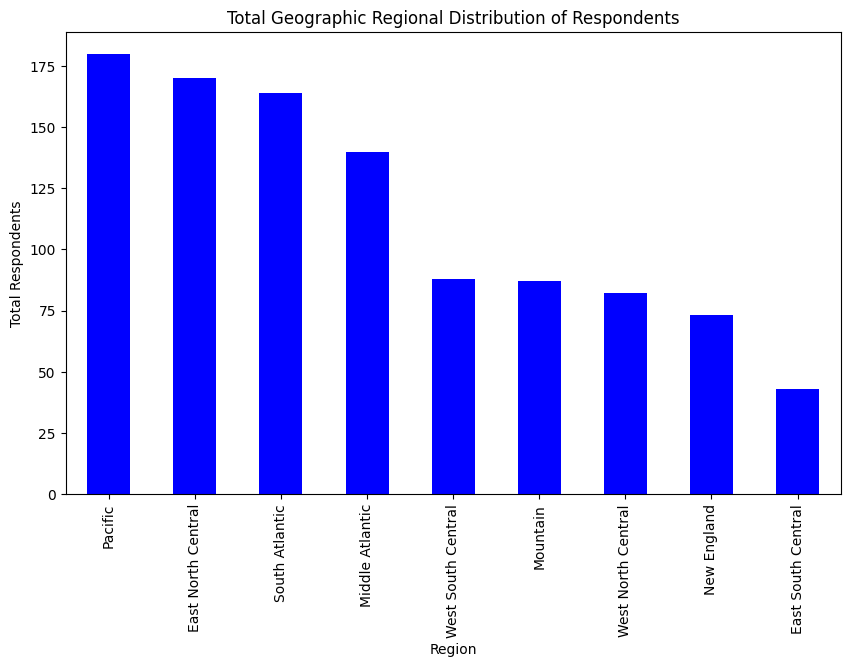

In [27]:
# loading in the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# calculating the aggregate sum for all respondents across distinct regions
commaSurvey_region = commaSurvey.groupby('location')['respondent_id'].count()

# ordering sum by largest to smallest
sorted_commaSurvey_region = commaSurvey_region.sort_values(ascending=False)

# display the total geographic regional distribution of respondents
plt.figure(figsize=(10, 6))
sorted_commaSurvey_region.plot(kind='bar', color='blue')
plt.xlabel('Region')
plt.ylabel('Total Respondents')
plt.title('Total Geographic Regional Distribution of Respondents')
plt.show()

- **Findings**: This bar chart displays the geographic representation of `comma_survey` respondents across different regions. To display the most common to least common regional representation, I ordered the plot in descending order. 

- **Primary Insights**: From this graph, it is apparent that the most common region for respondents is the 'Pacific' (over 175 respondents), followed by 'East North Central' (~170 respondents) and 'South Atlantic' (~160 respondents). The least common region represented is 'East South Central'(<50 respondents).

- **Limitations**: The meaning of these displayed regions is ambigious. In other words, what does it mean to be from 'East North Central'? Would it refer to being from the Northeastern United States? Furthemore, which states make up these regions? It is also reasonable to assume that there could be subjectivity tied into the meaning behind these regional names (e.g., different interpretations of what states make up the Midwestern United States).

- **Goal for Future Analyses**: Find out which states comprise the different aforementioned regions (e.g., which states are considered 'Pacific', as per guidelines for this survey?)

### **Research Question 3** - Do females spent time considering if the word, "data", is a singular or plural noun?
- **Variables used to answer the question + any operations done to prep variables**
    - Variables: 'gender' (create into gender_female), 'data_singular_plural' (convert T/F boolean into a numeric dummy variable)
    - Operations = Parse the 'gender' variable into entries for females, respectively. Then, filter out data for all females think about the usage of data as either a singular or plural noun. In order for me to develop a bar chart, it is imperative that I prepare my categorical gender variables (female). In addition, I need to derive out the 'True' row entries from the 'data_singular_plural' variable into a new binary dummy variable ('true_singular_plural').

- **Analyses I will perform + Cleaning & Prep**
    - Data Moves: Grouping all female respondent data into its own respective 'Female' dummy binary variables. Create a dummy binary variable for plural usage of data ('true_singular_plural'), converting these from T/F values from the original 'data_singular_plural'
    - Statistics: Chi-Square test
    - Data Visualizations: Stacked/Grouped Bar Chart
    - Information presented: Using the bar chart, I hope to have a supporting visual that can lead to a conclusion on if females tend to think more about the word, "data", and its noun usage.

In [28]:
# loading in the applicable libraries
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# converting the 'gender' variable into female dummy sub-variables
# use 0s and 1s to highlight boolean values (T/F)
commaSurvey['Female'] = (commaSurvey['gender'] == 'Female').astype(int)

# excluding NaN values for data_singular_plural
filtered_commaSurvey = commaSurvey.dropna(subset=['data_singular_plural'])

# convert data_singular_plural into a boolean dummy variable
true_singular_plural = [filtered_commaSurvey['data_singular_plural'].astype(int)]

# filtering out only the true values for the singular_plural
true_singular_plural = filtered_commaSurvey[filtered_commaSurvey['data_singular_plural'] == 1]

In [29]:
print(commaSurvey['Female'])

0       0
1       0
2       0
3       0
4       0
       ..
1124    1
1125    1
1126    1
1127    1
1128    0
Name: Female, Length: 1129, dtype: int32


In [30]:
# create contingency table for female chi-square test
contingency_table_female = pd.crosstab(filtered_commaSurvey['Female'], filtered_commaSurvey['data_singular_plural']),
chi2_female, p_female, _, _ = chi2_contingency(contingency_table_female)

# print results from chi-square test
print(f"Chi-square test for Female and Care towards Grammatical Usage of 'Data':")
print(f"Chi-square statistic: {chi2_female}, p-value: {p_female}\n")

# show contingency table
print(contingency_table_female)

Chi-square test for Female and Care towards Grammatical Usage of 'Data':
Chi-square statistic: 0.0009419945882121218, p-value: 0.9755152267853073

(data_singular_plural  False  True 
Female                            
0                       273    270
1                       274    274,)


- **Findings**: Regarding the chi-square test, the relationship between 'Female' and 'data_singular_plural' is statistically insignificant, with p = 0.975 (i.e., it does not reliably predict whether females care/do not care about the word, 'data', being used as a singular or plural word).

In [31]:
group_DataSP = filtered_commaSurvey.groupby('data_singular_plural').count()

# printing out the output
print(group_DataSP)

                      Unnamed: 0  respondent_id  gender  age  \
data_singular_plural                                           
False                        547            547     518  518   
True                         544            544     519  519   

                      household_income  education  location  \
data_singular_plural                                          
False                              413        511       513   
True                               423        515       514   

                      more_grammar_correct  heard_oxford_comma  \
data_singular_plural                                             
False                                  547                 547   
True                                   544                 544   

                      care_oxford_comma  write_following  care_data  \
data_singular_plural                                                  
False                               547              544        547   
True        

C:\Users\kcchi\AppData\Local\Temp\ipykernel_15800\1868891478.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male','Female'])


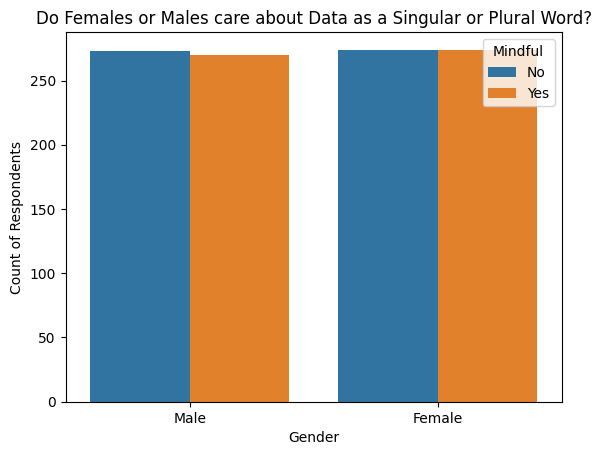

In [32]:
# stacked bar chart visualizing the distribution of care towards data used as a singular or plural word, across males and females
fig, ax = plt.subplots()
sns.countplot(data=filtered_commaSurvey, x='Female', hue='data_singular_plural')

# setting labels for the plot
ax.set_xlabel('Gender') #rename 0 and 1 to male & female
ax.set_ylabel('Count of Respondents')
ax.set_title('Do Females or Males care about Data as a Singular or Plural Word?')
ax.legend(title='Mindful', labels=['No', 'Yes'])
ax.set_xticklabels(['Male','Female'])

# displaying the plot
plt.show()

- **Findings**: This bar chart displays data from the 'female' and 'data_singular_plural' chi-square contingency table. With the female dummy variable, it was split into a boolean of 0 (i.e., male) and 1 (i.e., female) and excluded all 'NaN' values. The 'data_singular_plural' value was split to focus on those who spent/did not spend time thinking about data being a singular or plural word.

- **Primary Insights**: Based on the bar graph, it appears that females have equal sentiment towards spending time/not spending time thinking about if data is a singular or plural word (250+ respondents for both). On the other hand, it appears that slightly more males don't think about if data is a singular or plural word. 
    - Going back to the research question, it is difficult to fully conclude whether females care/don't care about if data is a singular or plural word, through solely looking at the above bar graph.

- **Limitations**: The bars are too closely leveled for male and female because of the output from the contingency table. For someone who is looking at this with a fresh set of eyes, this visual might seemingly appear as "deceptive". 

- **Goal for Future Analyses**: Experiment with data filtering and splicing to determine similar ways to depict such data.

### - **Section 7: Reflection** -

- Learned how to conduct chi-square tests
- Gained further practice with .ipynb markdown text formatting
- Customized bar graphs to fit with the story behind each research question, to the best of my ability
- Used documentation to help with understanding syntax
- Enhanced p-value interpretation skills after conducting chi-square tests
- Developed a holistic narrative based on the data visualization
- Practiced Python piping syntax (e.g., '.astype(int)') to conduct multiple data manipulation operations
- Before this project I had minimal experience with programming in Python and was more familar with R. After taking on this project, I feel a lot more comfortable with coding in Python and think I have some basic fundamentals in my toolkit.